# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

Human body temperature is a critical aspect of the body that is regulated through homeostatic mechansims to provide an optimal temperature range for chemical reactions in the body. While the details of homeostatic mechanisms are often complex, in general they can be understood as a system of feedback loops that allow a process to regulate around a set point or a baseline measure. The feedback loops ensure that if the process deviates too much from the set point, regulatory mechanisms are activated to return the process to its baseline. As such, the baseline of a process is important to understand because it often has important biological implications.


The first baseline value for human body temperature was proposed as  by a German physician named Carl Wunderlich in the 1800s, the mean body temperature was 37 degree celsius or 98.6 degree farenheit. Although this value has since been updated to 36.8 degree celsius (98.2 degree farenheit) using more modern methodoloy (1), Wunderlich's proposal was used widely for more than 120 years. This notebook explores measures of human body temperature in order to understand more about an important aspect of our health and daily life.

**References**

1. Mackowiak, P. A. (1992). A Critical Appraisal of 98.6°F, the Upper Limit of the Normal Body Temperature, and Other Legacies of Carl Reinhold August Wunderlich. JAMA: The Journal of the American Medical Association, 268(12), 1578. 

# 1. Is the distribution of body temperature normal?

This first section will provide some initial quality insurance on the dataset and then provide visualizations and statistical analysis of the distribution of temperature measurements.

In [81]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest

# read data
df = pd.read_csv('data/human_body_temperature.csv')

In [79]:
# set figure properties
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

In [2]:
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


The dataframe contains body temperature measurements for males and females along with (presumably) average heart rate during temperature measurement.

In [3]:
df.shape

(130, 3)

There are a total of 130 observations across the three variables of interest.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


There appear to be records for the three variables for each observation. Next, let's check the descriptive statistics of the dataset. It is important to check the minimum values in the output for non-categorical variables to ensure that missing entries are not coded as a zero.

In [13]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


Everything here looks accurate with no zero values. Also note that the mean body temperature in the dataset is 98.2 degree farenheit, which is what we would expect based on the revised mean. Now let's take a closer look at the distribution of temperature measurements.

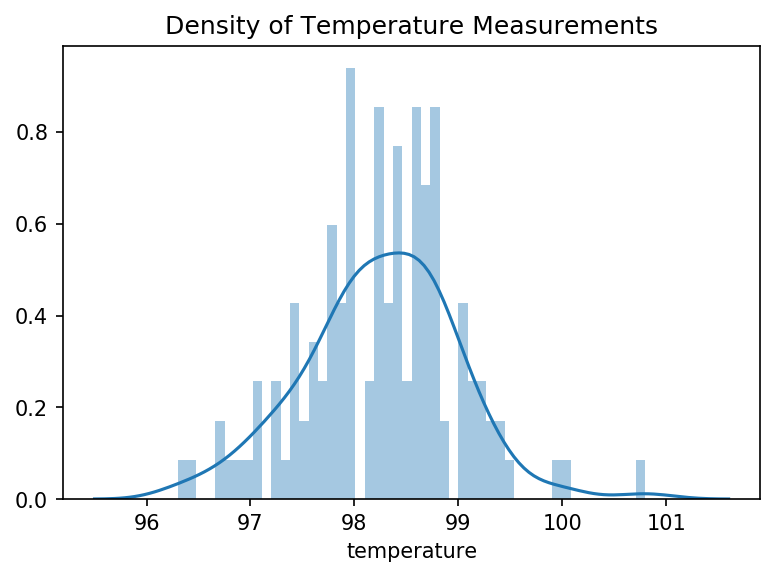

In [87]:
# plot temperature with a kernel density estimation
sns.distplot(df['temperature'], bins=50)
mpl.pyplot.title('Density of Temperature Measurements');

When inspecting distribution plots such as this, there are two important aspects to look at: skewness and kurtosis. 

* Skewness represents the degree of symmetry in a distribution and can be thought of as the frequency of observations around the average value. In a symmetric distribution such as the normal distribution, skew is equal to zero and the average value of the dataset is at the peak of the curve. When there is non-symmetry present, we say that a distribution is either right or left skewed. The direction depends primarily on whether the average value is to the left or right of the peak. If it is to the left, we say that the distribution has a left skew, and when it is to the right it is right skewed.

* Kurtosis is the combined sizes of the left and right tails of the distribution. The kurtosis of a normal distribution is equal to 3 and is used as a reference point when looking at the distribution of a sample. If the kurtosis value is greater than 3, there are more observations in the tails of the distribution than would be expected if it were normal, and conversely if kurtosis is less than 3 there are less observations.

With the mean of 98.2 degree farenheit in mind, it appears that the dataset is skewed somewhat to the left. However, the skewness observed here does not appear to be that extreme. Let's calcualte its value to see.

In [89]:
df['temperature'].skew()

-0.004419131168995771

Here, we are looking at how close the value is to zero. In this case, the skew is small indicating that the distribution is largely symmetric.

In terms of kurtosis, it appears the left most tail (high temperatures) is smaller than that of a normal distribution. Let's quantify this. **Pandas uses a definition of kurtosis where the a normal distribution has a kurtosis equal to zero**. So here we are looking for values that deviate from zero to a large extent.

In [90]:
df['temperature'].kurtosis()

0.7804573950337375

As with skew, it does appear that there is some devation from normality, but it is small and likely to not cause issues in the subsequent statistical analyses.

Lastly, we can conduct a statistical test that assigns a probabilty value to deviations from normality. A commonly used test is the Shapiro-Wilk test that tests the null hypothesis that the sample came from a normally distributed population. Here, we will be interested in seeing if the p-value is less than 0.05.

In [91]:
from scipy.stats import shapiro
stat, p = shapiro(df['temperature'])

In [96]:
print(f'The p-value is {round(p, 2)} indicating that we can confirm the null hypothesis that the sample comes from a normally distributed population.')

The p-value is 0.23 indicating that we can confirm the null hypothesis that the sample comes from a normally distributed population.


# 2. Is the sample size large? Are the observations independent?

The sample size in the datset is:

In [97]:
df.shape[0]

130

While there are many considerations into understanding what a proper sample size is (e.g. expected difference in mean values when comparing two groups), generally we are concerned with approximating a normal distribution if we are planning to use parametric statistics. As we saw with the Shapiro-Wilks test above, the sample size of 130 is normally distributed and therefore we can conclude that we have a large enough sample size for our purposes.

To understand if the observations are independent, we would need to know more about how the data was collected. It may be that the observations were repeated measures, with body temperature recordings collected at different time points from a group of participants. However, typically there is some form of participant ID in a dataset when this is done, so that the within subject measures can be properly modeled. Since there are no participant IDs here, we can assume that the measurements were done on different individuals. Assuming these individuals are randomly sampled from the population, and not part of a treatement group (e.g. patients recieving a particular treatment), we can assume that the observations are independent.

# 3. Is the true population mean really 98.6 degrees F? 

## 3.1 Bootstrap confidence intervals

To test whether the population mean is 98.6 degrees farenheit, one approach is to calculate confidence intervals using the bootstrap method. This approach takes the observations of a measurement and samples from it in order to calculate a statistic of interest. 

In the current dataset, this works by taking the 130 observations of body temperature, randomly selecting one of the observations, then selecting another value. Here we will bootstrap with replacement, meaning that if an observation is selected, it will not be removed from the dataset and can be randomly selected again. This random selection typically involves selecing a sample of the same size and calculating the statistic of interest *n* number of times. We then obtain a distribution of the statistic and can calculate a confidence interval. This confidence interval tells us the probability of obtaining a certain value for the statistic. In our case, we will calculate a 95% confidence interval for the sample mean of body temperature. This will tell us, given the sample we've taken, the likelinood of obtaining a body temperature measurement of 98.6 degrees farenheit.

In [109]:
# function to calculate bootstrap
def bootstrap(data, func, size):
    """A function to bootstap the mean value of a dataset n number of times.
       Input parameters ar a 1D array of values and the number of bootstrap samples to perform."""
    # array to hold bootstap mean values
    bs = np.empty(size)
    # bootstrap mean n times
    for s in range(size):
        bs[s] = func(np.random.choice(data, len(data)))
    # return bootstrap mean values
    return bs

In [110]:
# draw 10,000 samples of body temperature mean
bs_mean = bootstrap(df.temperature, func=np.mean, size=10000)

In [122]:
# calculate percentiles
### note that we will be using a two tail test because we don't have a strong hypothesis 
### that 98.6 degree farenheit should be above or below the mean
print(f'The lower bound of the 95% confidence interval is {round(np.percentile(bs_mean, 2.5), 2)} and the upper bound is {round(np.percentile(bs_mean, 97.5), 2)}.')

The lower bound of the 95% confidence interval is 98.12 and the upper bound is 98.38.


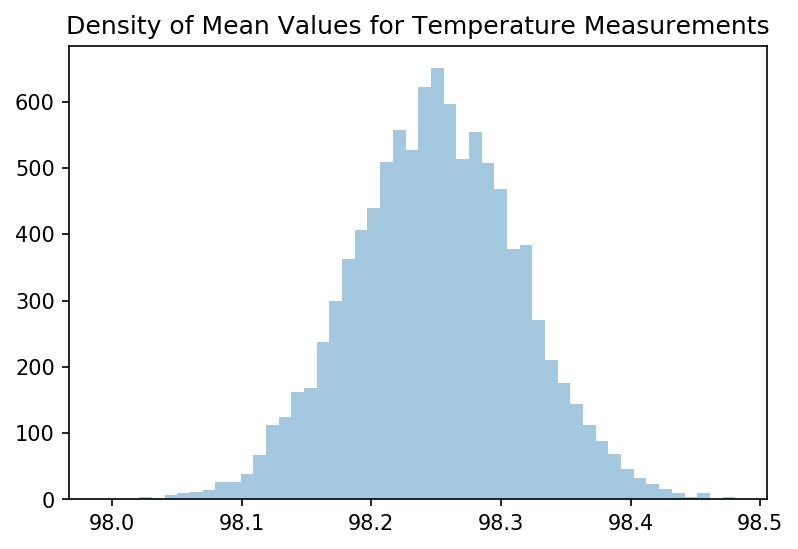

In [127]:
sns.distplot(bs_mean, kde=False)
mpl.pyplot.title('Density of Mean Values for Temperature Measurements');

Given our sample, we can infer that we will obtain a mean body temperature value of 98.6 degree farenheit less than 95% of the times we sample the population. This indicates that it is not the true population mean and is much higher a value. This is also evident in the above plot, where 98.6 is to the far right of the histogram.

## 3.2 Frequentist statistics

In this section, we'll calculate a *t*-statistic to test whether the null hypothesis that the mean of body temperature in the dataset is equal to 98.6 degrees farenheit. We will use a two-tail test because, as outlined above, we don't have strong hypothesis that the true population mean should be above or below 98.6.

We select a *t*-statistic because we don't know what the standard deviation of the population is. This is a requirement for the z-statistic. However, in practice with large sample like the current one, the interpretation of these statistics will largely resemble each other.

In [136]:
# calculate two tail one sample t-test
t, p = stats.ttest_1samp(df.temperature, 98.6)
# display results
print(f'The t-statistic for the test is {t} and the p-value is {round(p,3)}.')

The t-statistic for the test is -5.4548232923645195 and the p-value is 0.0.


Because the *p*-value of the test is below 0.001, we can reject our null hypothesis and infer that the true population mean is not equal to 98.6.

We can compare this to the *z*-statistic to see how similar the two tests are.

In [143]:
# use statsmodels to conduct z-test
z, p = ztest(df.temperature, value=98.6, alternative='two-sided')
# display results
print(f'The z-statistic for the test is {z} and the p-value is {round(p,3)}.')

The t-statistic for the test is -5.4548232923645195 and the p-value is 0.0.


We can see here that the values are identical. However, the actual *p*-value will differ slightly between the two tests but the interpretation (i.e. reject the null hypothesis) will not. This is because the z-test and its corresponding table are based on a standardized distribution.

## 4. Downsampling to n = 10

In this section, we'll reduce the sample size to *n* = 10 and compare the t and z statistic.

In [159]:
# set seed
np.random.seed(42)
# randomize 10 index values for downsampling
to_sample = list(np.random.choice(range(0,130), size=10, replace=False))
df_down = df.iloc[to_sample]

In [161]:
# calculate two tail one sample t-test
t, p = stats.ttest_1samp(df_down.temperature, 98.6)
# display results
print(f'The t-statistic for the test is {t} and the p-value is {round(p,3)}.')

The t-statistic for the test is -1.5606191828511504 and the p-value is 0.153.


In [162]:
# use statsmodels to conduct z-test
z, p = ztest(df_down.temperature, value=98.6, alternative='two-sided')
# display results
print(f'The z-statistic for the test is {z} and the p-value is {round(p,3)}.')

The t-statistic for the test is -1.5606191828511504 and the p-value is 0.119.


As with the larger sample, the test statistic is the same but the associated p-value is different. With n = 10, it is appropriate to use the t-test because, as outlined above, a z-test requires knowning the standard deviation of the population, which is harder to estimate with a smaller sample size.

## 5. Abnormal temperature

At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

This section looks at the variability of temperature measurements to estimate what an abnormal temperature would be. Biomedical research typically uses a conservative critical p-value of 0.01, so we will calculate the 99% confidence interval of mean body temperature and the associated margin of error.

A confidence interval for a variable is calculated by a point estimate (the sample mean) plus or minus an associated z/t value (based on the desired interval) that is multiplied by the quotient of the sample standard deviation and the square root of the sample size. z/t values are taken from their associated table. Here, since we don't know the population standard deviation, we will use a t-value of 2.626 for the 99% confidence interval.

Related to the confidence interval is the margin of error. It is the radius of the confidence interval around the sample statistic and can be thought of the range of the confidence interval abover or below the sample statistic.

In [189]:
def ci(variable, critical_val, percent):  
    """Method for calculating a confidence interval given a specific critical value."""
    # calculate sample mean and standard deviation
    x = np.mean(variable)
    s = np.std(variable)
    # calcualte margin of error
    me = critical_val * (s/np.sqrt(len(df)))
    # display results
    print(f'The sample mean is {x} and standard deviation is {s}. \
          \nThe margin of error is {round(me, 3)} and the {percent}% confidence interval for mean body temperature is {round(x-me, 3)} to {round(x+me, 3)}.')

# calculate 99% confidence interval for sample mean
ci(variable=df.temperature, critical_val=2.626, percent='99')

The sample mean is 98.24923076923075 and standard deviation is 0.730357778905038.           
The margin of error is 0.168 and the 99% confidence interval for mean body temperature is 98.081 to 98.417.


We can also calculate these values using our bootstrap sample.

In [187]:
# calculate 99% confidence interval for bootstrap sample mean
ci(variable=bs_mean, critical_val=2.626, percent='99')

The sample mean is 98.24985353846154 and standard deviation is 0.06483399077388849.
The margin of error is 0.015 and the 99% confidence interval for mean body temperature is 98.235 to 98.265.


As we can see in the printouts, the bootstrap method provides a slightly less variable estimate of the population mean. Next, we'll calculate abnormal temperature as being 2.5 standar deviations from the mean, which estimates the cutoff points for values falling outside 99% values around the mean.

In [207]:
def abnormal(data):
    """Method to display abnormal temperatures."""
    x = np.mean(data)
    s = np.std(data)
    print(f'Given a mean value of {round(x, 3)}, body temperatures below {round(x - 2.5 * s, 3)} and above {round(x + 2.5 * s, 3)} will be considered abnormal.')

In [208]:
# find abnormal temperatures from sample data
abnormal(df.temperature)

Given a mean value of 98.249, body temperatures below 96.423 and above 100.075 will be considered abnormal.


## 6. Differences between male and female 

Last, we'll test whether there are significant differences in body temperature between males and females.

In [210]:
df.gender.value_counts()

F    65
M    65
Name: gender, dtype: int64

We have equal sample sizes between groups. As such, we'll use an independent sample t-test to test the null hypothesis that mean body temperature does not differ between genders.

In [217]:
# group dataframe by gender
gender = df.groupby('gender')
# extract gender data
females = gender.get_group('F').temperature
males = gender.get_group('M').temperature

In [228]:
gender.temperature.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,65.0,98.393846,0.743488,96.4,98.0,98.4,98.8,100.8
M,65.0,98.104615,0.698756,96.3,97.6,98.1,98.6,99.5


First, we need to test whether the two genders have equal variances. We use Levene's test of equality of variances to test the null hypothesis that the two samples have equal variances.

In [221]:
# test whether genders have equal variance
w, p = stats.levene(females, males)
# dispaly results
print(f'The test statistic is {round(w, 3)} with a probability of {round(p, 3)}.')

The test statistic is 0.064 with a probability of 0.801.


Given the high p-value, we conculde that the null hypothesis is correct and each gender has equivalent variances.

In [223]:
t, p = stats.ttest_ind(females, males)
print(f'The test statistic is {round(t, 3)} with a probability of {round(p, 3)}.')

The test statistic is 2.285 with a probability of 0.024.


Using a critical p-value of 0.05, we reject the null hypothesis that the two genders have equal body temperatures.

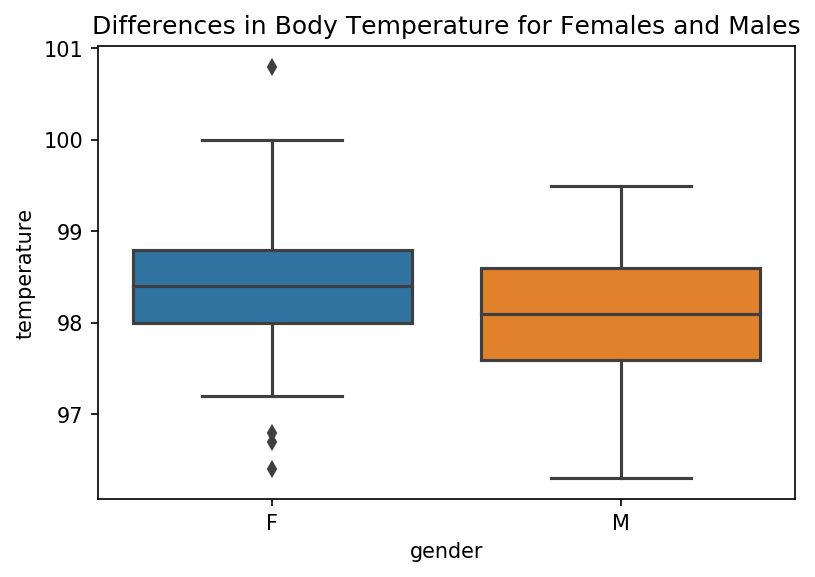

In [226]:
sns.boxplot(x=df.gender, y=df.temperature)
mpl.pyplot.title('Differences in Body Temperature for Females and Males');

From this plot we can see that there is a slight increase in body temperatures compared to females. However, there also appears to be more abnormal temperatures in females. Let's do one final comparison by removing datapoints that are above/below our limits for abnormal measurements.

In [ ]:
Given a mean value of 98.249, body temperatures below 96.423 and above 100.075 will be considered abnormal.

In [233]:
df_cleaned = df[(df.temperature > 96.423) & (df.temperature < 100.075)]

In [234]:
# group dataframe by gender
gender = df_cleaned.groupby('gender')
# extract gender data
females = gender.get_group('F').temperature
males = gender.get_group('M').temperature
# display descriptive statistics for temperature
gender.temperature.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,63.0,98.387302,0.642699,96.7,98.0,98.40,98.8,100.0
M,64.0,98.132812,0.665965,96.7,97.6,98.15,98.6,99.5


In [235]:
# test whether genders have equal variance
w, p = stats.levene(females, males)
# dispaly results
print(f'The test statistic is {round(w, 3)} with a probability of {round(p, 3)}.')

The test statistic is 0.595 with a probability of 0.442.


Based on these values, we can still assume equal variances.

In [237]:
t, p = stats.ttest_ind(females, males)
print(f'The test statistic is {round(t, 3)} with a probability of {round(p, 3)}.')

The test statistic is 2.191 with a probability of 0.03.


Although removing abnormal temperatures reduced the t-statistic, we still reject the null hypothesis that the two genders do not differ in body temperature.

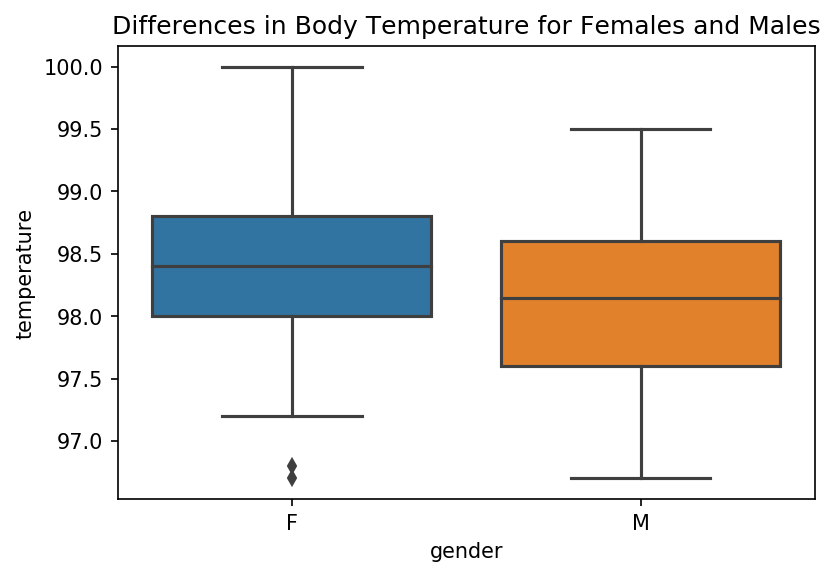

In [239]:
sns.boxplot(x=df_cleaned.gender, y=df_cleaned.temperature)
mpl.pyplot.title('Differences in Body Temperature for Females and Males');

## 7. Summary 

Through the exploratory data analysis in this notebook, we can see that the original proposal of a mean body temperature of 98.6 degree farenheit is not supported by the current dataset. Rather, the revised proposal of 98.2 degree farenheit is more accurate. Body temperature appears to differ between males and females however, with females having a higher body temperature on average. Even after removing temperature measures deemed abnormal, the two genders appear to differ in body temperature.